
## ECOPs AFRICA OCEAN COLOUR TRAINING

### M2-L2: Data manipulation and analysis
<span style="color:brown; font-size:1.2em;font-style:italic">Part2: 1. Time-series analysis: Point/Region time-series</span>
<hr style="border:2px solid rgb(30,70,125)"> </hr>


<span style="font-size:1.1em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button.   
Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Point extract](#3.-Point-extract)
- [4. Region extract](#4.-Region-extract)
- [5. Resources](#5.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

In this exercise you will learn to
- extract a point or region time-series from a list of satellite images.
- interprete the seasonal variation of chlorophyll and sea surface temperature

The images we will be using are the NASA's [Level-3 Browser](https://oceancolor.gsfc.nasa.gov/l3/).

***

# 2. Library import   
[Return to the "Table of contents"](#Table-of-contents)

Start by importing require modules for this activity   
If a module throws a `ModuleNotFoundError` try installing it with the command  
- `!conda install --channel "conda-forge" module` or with  
- `!pip install module`  

If you have a requirement file containing the names of the modules you want to install, use
- `!pip install -r requirements.txt`

Remove `!` if you run the command directly in your terminal or command prompt.   
For this exercise we created a Python environment using the `environment.yml` file which contains the required module.   
You can also add additional modules to the list.

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# System
import sys
from pathlib import Path

# Visualization
from matplotlib import colors, pyplot as plt
from matplotlib.dates import DateFormatter
from cartopy import crs as ccrs, feature as cfeature

%matplotlib inline

Matplotlib comes with defaults parameters used for plotting and visualization.   
For example, during instantiation of figures in Matplotlib, often we pass `figsize` parameter to `plt.figure`. <br>
Matplotlib can also be customized to override the default values using rc (runtime configuration) settings.
***

In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['savefig.facecolor'] = '0.8'
# plt.rcParams['figure.constrained_layout.use'] = True

- **Local modules**  

Include a local library (scripts) with custom fuctions.  

We use the `sys` module to append a directory to the list of known paths for interpreter to search.  
This allow us to import the custom functions or modules not in the search directories.

We also use the `Path` library to help us get the name of the current working directory.

---

In [3]:
# appending a path
cwd = Path.cwd()
sys.path.append(str(cwd.parent))

import octutils as util

In [4]:
output_dir = cwd.joinpath('data')
manifest, = list(output_dir.glob('http_manifest.txt'))
# manifest = 'C:\Users\http_manifest.txt'

In [5]:
# util.getfile(bbox=None, 
#              start_date=None, 
#              end_date=None, 
#              output_dir=output_dir, 
#              sensor='modisa', 
#              manifest=manifest)

# 3. Point extract
[Return to the "Table of contents"](#Table-of-contents)
- Get the monthly time series from a point extracted from chlorophyll and sst images  

In [6]:
%%time
varname = 'chlor_a'    # extract variable name 
chlf = list(output_dir.glob(f'A*{varname}.nc'))

# point = {'lon': [32.8, 35, 40.6], 'lat': [-26, -20, -16]} # geolocation
point = {'lon': [32.8], 'lat': [-26]} 
# point = {'lon': [33.05], 'lat': [-25.75]} 
window = 5 # number of pixel around the centre point, extract window
save_to = output_dir.joinpath('point_series.txt')

df = util.pyextract(bbox=point, window=window, ofile=save_to, ifiles=chlf, var=varname, mode='w')

Wall time: 1.94 s


In [8]:
df.head()

,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value
0,A20210012021031.L3m_MO_CHL.x_chlor_a.nc,32.8,-26,chlor_a,2021-01-01T00:10:01Z,2021-02-01T02:59:59Z,25,23,2,0.759905,4.286929,2.040380,2.330184,1.716142,1.621531
1,A20210322021059.L3m_MO_CHL.x_chlor_a.nc,32.8,-26,chlor_a,2021-02-01T00:05:01Z,2021-03-01T02:24:59Z,25,23,2,0.712590,6.438710,3.343255,4.016668,1.934017,3.706131
2,A20210602021090.L3m_MO_CHL.x_chlor_a.nc,32.8,-26,chlor_a,2021-03-01T00:25:01Z,2021-04-01T02:49:59Z,25,23,2,2.925616,6.888900,5.361518,5.808807,1.279426,5.195235
3,A20210912021120.L3m_MO_CHL.x_chlor_a.nc,32.8,-26,chlor_a,2021-04-01T00:00:01Z,2021-05-01T02:59:59Z,25,23,2,1.646092,5.720479,3.659830,3.948219,1.406268,3.266183
4,A20211212021151.L3m_MO_CHL.x_chlor_a.nc,32.8,-26,chlor_a,2021-05-01T00:00:00Z,2021-06-01T02:49:59Z,25,23,2,1.115669,4.884576,2.780596,3.061207,1.546364,2.608324


In [10]:
%%time
varname = 'sst'    # extract variable name 
sst = list(output_dir.glob(f'A*{varname}.nc'))
# append data to chlor_a data file
df = util.pyextract(bbox=point, window=window, ofile=save_to, ifiles=sst, var=varname, mode='a')
df['date'] = pd.to_datetime(df['time_start'])

Wall time: 1.28 s


In [11]:
df.tail()

,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value,date
31,AQUA_MODIS.20210801_20210831.L3m.MO.SST.x_sst.nc,32.8,-26,sst,2021-08-01T00:20:00Z,2021-09-01T02:45:00Z,25,25,0,19.844999,20.990000,20.264999,20.119999,0.350876,20.295000,2021-08-01 00:20:00+00:00
32,AQUA_MODIS.20210901_20210930.L3m.MO.SST.x_sst.nc,32.8,-26,sst,2021-09-01T00:45:00Z,2021-10-01T02:55:00Z,25,25,0,21.145000,21.994999,21.581602,21.529999,0.198921,21.504999,2021-09-01 00:45:00+00:00
33,AQUA_MODIS.20211001_20211031.L3m.MO.SST.x_sst.nc,32.8,-26,sst,2021-10-01T00:00:00Z,2021-11-01T02:19:59Z,25,25,0,22.619999,23.240000,22.844999,22.764999,0.166277,22.644999,2021-10-01 00:00:00+00:00
34,AQUA_MODIS.20211101_20211130.L3m.MO.SST.x_sst.nc,32.8,-26,sst,2021-11-01T00:10:01Z,2021-12-01T02:29:59Z,25,25,0,22.889999,23.559999,23.281199,23.295000,0.176925,23.184999,2021-11-01 00:10:01+00:00
35,AQUA_MODIS.20211201_20211231.L3m.MO.SST.x_sst.nc,32.8,-26,sst,2021-12-01T00:25:00Z,2022-01-01T02:04:59Z,25,25,0,26.055000,28.025000,27.077000,27.025000,0.623742,26.564999,2021-12-01 00:25:00+00:00


In [12]:
def plot_ts(frame, x, y, ax, var, color='g', legend=True):
    if type(x) == list:
        x = ';'.join(f'{v}' for v in x)
        y = ';'.join(f'{v}' for v in y)
    idx = (frame['lon'].isin([x]) & 
           frame['lat'].isin([y]) & 
           frame['variable'].isin([var]))
    if legend:
        frame.loc[idx, :].plot(x='date', y='median', 
                               color=color,
                               ax=ax, marker='o', 
                               label=f'lon={x}, lat={y}')
        return
    frame.loc[idx, :].plot(x='date', y='median', color=color, 
                           ax=ax, marker='o', legend=legend)

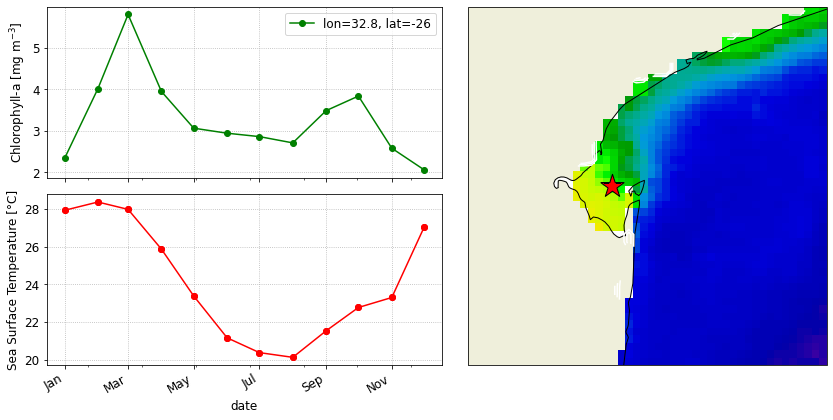

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True)
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, -1]:
    ax.remove()
axm = fig.add_subplot(gs[:, -1], projection=ccrs.PlateCarree())
axm.coastlines()
axm.add_feature(cfeature.LAND)
axm.set_extent((32, 34, -27, -25))

# get chlor_a annual composite and to the map 
x, y, z = util.get_composite(files=chlf, var='chlor_a')
axm.pcolormesh(x, y, z, norm=colors.LogNorm(), cmap='nipy_spectral', shading='auto')

# add sst contour to map
x, y, z = util.get_composite(files=sst, var='sst')
cs = axm.contour(x, y, z, colors='w', levels=[25.5, 26.5, 27.5])
ax.clabel(cs, inline=True)

for x, y in zip(point['lon'], point['lat']):
    # find each point and the TS for chlor_a
    plot_ts(frame=df, x=x, y=y, ax=axs[0, 0], var='chlor_a')
    
    # now TS for sst
    plot_ts(frame=df, x=x, y=y, ax=axs[1, 0], var='sst', legend=False, color='r')
        
    # add the point locations on the map     
    util.add_marker(bbox={'lon': [x], 'lat': [y]}, 
                    ax=axm, marker='*', fc='r', size=600)

axs[0, 0].set_ylabel('Chlorophyll-a [mg m$^{-3}$]')
# Define the date format
fmt = DateFormatter("%b")
axs[0, 0].xaxis.set_major_formatter(fmt)
axs[1, 0].set_ylabel('Sea Surface Temperature [\N{DEGREE SIGN}C]')

fig.tight_layout()

# 4. Region extract
[Return to the "Table of contents"](#Table-of-contents)
- Define a box off Maputo Bay and try to get the time series 

In [14]:
%%time
# region = {'lon': [[32.9, 33.2]], 'lat': [[-25.9, -25.6]]} 
# region = {'lon': [[32.7, 32.9]], 'lat': [[-25.9, -26.1]]} 
region = {'lon': [[33.2, 33.5]], 'lat': [[-25.9, -26.1]]} 
save_to = output_dir.joinpath('region_series.txt')

df = util.pyextract(bbox=region, window=window, 
                    ofile=save_to, ifiles=chlf, 
                    var='chlor_a', mode='w')
df = util.pyextract(bbox=region, window=window, 
                    ofile=save_to, ifiles=sst,
                    var='sst', mode='a')
df['date'] = pd.to_datetime(df['time_start'])
df.head()

Wall time: 1.23 s


,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value,date
0,A20210012021031.L3m_MO_CHL.x_chlor_a.nc,33.2;33.5,-25.9;-26.1,chlor_a,2021-01-01T00:10:01Z,2021-02-01T02:59:59Z,28,28,0,0.188264,0.213925,0.198236,0.197827,1.036865,NaN,2021-01-01 00:10:01+00:00
1,A20210322021059.L3m_MO_CHL.x_chlor_a.nc,33.2;33.5,-25.9;-26.1,chlor_a,2021-02-01T00:05:01Z,2021-03-01T02:24:59Z,28,28,0,0.188738,0.356088,0.242602,0.245345,1.151537,NaN,2021-02-01 00:05:01+00:00
2,A20210602021090.L3m_MO_CHL.x_chlor_a.nc,33.2;33.5,-25.9;-26.1,chlor_a,2021-03-01T00:25:01Z,2021-04-01T02:49:59Z,28,28,0,0.171026,0.265369,0.215903,0.217832,1.112395,NaN,2021-03-01 00:25:01+00:00
3,A20210912021120.L3m_MO_CHL.x_chlor_a.nc,33.2;33.5,-25.9;-26.1,chlor_a,2021-04-01T00:00:01Z,2021-05-01T02:59:59Z,28,28,0,0.164218,0.230181,0.189987,0.186554,1.091188,NaN,2021-04-01 00:00:01+00:00
4,A20211212021151.L3m_MO_CHL.x_chlor_a.nc,33.2;33.5,-25.9;-26.1,chlor_a,2021-05-01T00:00:00Z,2021-06-01T02:49:59Z,28,28,0,0.137067,0.161828,0.148113,0.148639,1.048729,NaN,2021-05-01 00:00:00+00:00


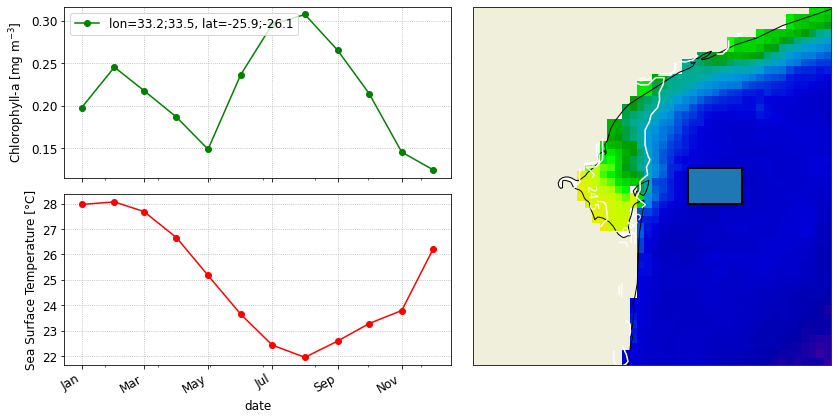

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True)
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, -1]:
    ax.remove()
axm = fig.add_subplot(gs[:, -1], projection=ccrs.PlateCarree())
axm.coastlines()
axm.add_feature(cfeature.LAND)
axm.set_extent((32, 34, -27, -25))
# axm.set_extent((31, 42, -27, -15))

# get chlor_a annual composite and the map 
x, y, z = util.get_composite(files=chlf, var='chlor_a')
axm.pcolormesh(x, y, z, norm=colors.LogNorm(), cmap='nipy_spectral', shading='auto')

# add sst contour to map
x, y, z = util.get_composite(files=sst, var='sst')
cs = axm.contour(x, y, z, colors='w', levels=[24.5, 26.5, 27.5])
ax.clabel(cs, inline=True)

for x, y in zip(region['lon'], region['lat']):
    # find each point and the TS for chlor_a
    plot_ts(frame=df, x=x, y=y, ax=axs[0, 0], var='chlor_a')
    
    # now TS for sst
    plot_ts(frame=df, x=x, y=y, ax=axs[1, 0], var='sst', legend=False, color='r')
        
    # add the point locations on the map     
    util.add_marker(bbox={'lon': [x], 'lat': [y]}, ax=axm, marker='o')

axs[0, 0].set_ylabel('Chlorophyll-a [mg m$^{-3}$]')
# Define the date format
fmt = DateFormatter("%b")
axs[0, 0].xaxis.set_major_formatter(fmt)
axs[1, 0].set_ylabel('Sea Surface Temperature [\N{DEGREE SIGN}C]')

fig.tight_layout()

<div class="alert alert-block alert-warning" /div>
    <h3>Task</h3>
    
--- 
    
Repeat the same exercise for your region of interest.     
Compare a point extracted in the coastal waters with that from open waters.   
Think of a reason for the large difference in the amount of phytoplankton between the regions.   
Think of a reason why the temperature difference is smaller when compare to sea surface temperature.

<div class="alert alert-block alert-info" /div>
<h2>Bonus!</h2>
 
--- 
    
Rrs spectral difference between costal and open waters

In [16]:
%%time
keys = ['Rrs_412', 'Rrs_443', 'Rrs_469',
        'Rrs_488', 'Rrs_531', 'Rrs_547', 
        'Rrs_645', 'Rrs_667', 'Rrs_678'] 
files = ['A2021122115500.L2_LAC_OC.nc', 
         'A2021123105500.L2_LAC_OC.nc',
         'A2021126113000.L2_LAC_OC.nc',
         'A2021127121500.L2_LAC_OC.nc']
rrsf = [output_dir.joinpath(f) for f in files]

point = {'lon': [32.8, 33.3], 'lat': [-26, -26]} 
window = 5 
save_to = output_dir.joinpath('rrs_point_series.txt')

df = util.pyextract(bbox=point, window=window, 
                    ofile=save_to, ifiles=rrsf, 
                    var=keys, mode='w')
df.head()

Wall time: 1min 24s


,file,lon,lat,variable,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value
0,A2021122115500.L2_LAC_OC.nc,32.8,-26,Rrs_412,2021-05-02T11:55:01Z,2021-05-02T11:59:59Z,25,25,0,0.004576,0.007060,0.005856,0.005968,0.000802,0.006242
1,A2021122115500.L2_LAC_OC.nc,33.3,-26,Rrs_412,2021-05-02T11:55:01Z,2021-05-02T11:59:59Z,25,0,25,NaN,NaN,NaN,NaN,NaN,NaN
2,A2021122115500.L2_LAC_OC.nc,32.8,-26,Rrs_443,2021-05-02T11:55:01Z,2021-05-02T11:59:59Z,25,25,0,0.005012,0.008186,0.006673,0.006880,0.001037,0.007390
3,A2021122115500.L2_LAC_OC.nc,33.3,-26,Rrs_443,2021-05-02T11:55:01Z,2021-05-02T11:59:59Z,25,0,25,NaN,NaN,NaN,NaN,NaN,NaN
4,A2021122115500.L2_LAC_OC.nc,32.8,-26,Rrs_469,2021-05-02T11:55:01Z,2021-05-02T11:59:59Z,25,25,0,0.005854,0.009350,0.007768,0.007940,0.001161,0.008420


In [17]:
def get_spectra(frame, file, x, y, ax, color='g', legend=True):
    if type(x) == list:
        x = ';'.join(f'{v}' for v in x)
        y = ';'.join(f'{v}' for v in y)
    idx = (frame['lon'].isin([x]) & 
           frame['lat'].isin([y]) & 
           frame['file'].isin([file]))
    
    frame.loc[idx, 'wavelength'] = [
        float(var.split('_')[1])
        for var in frame.loc[idx, 'variable']
    ]
    
    if legend:
        frame.loc[idx, :].plot(x='wavelength', y='median', 
                               color=color,
                               ax=ax, marker='o', 
                               label=f'lon={x}, lat={y}')
        return
    frame.loc[idx, :].plot(x='wavelength', y='median', color=color, 
                           ax=ax, marker='o', legend=legend)

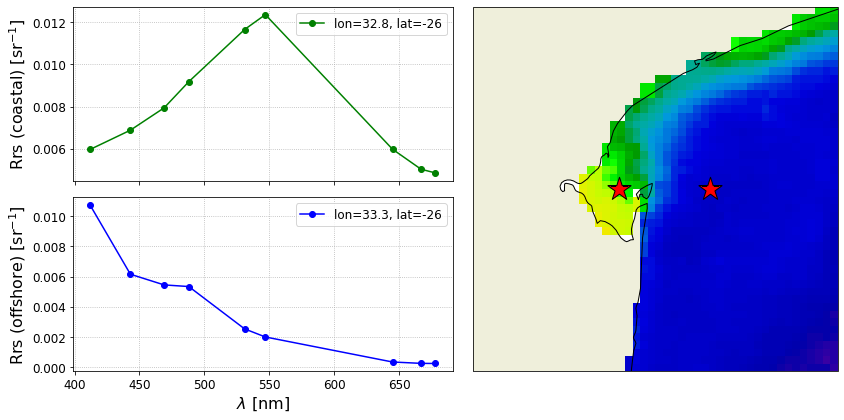

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True)
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, -1]:
    ax.remove()
axm = fig.add_subplot(gs[:, -1], projection=ccrs.PlateCarree())
axm.coastlines()
axm.add_feature(cfeature.LAND)
axm.set_extent((32, 34, -27, -25))

# the chlor_a is unrelated to the Rrs being show, just to get some intuitive idea 
x, y, z = util.get_composite(files=chlf, var='chlor_a')
axm.pcolormesh(x, y, z, norm=colors.LogNorm(), cmap='nipy_spectral', shading='auto')


loop = zip(point['lon'], point['lat'], ['g', 'b'])
for i, (x, y, c) in enumerate(loop):
    # find each point
    get_spectra(frame=df.copy(), x=x, y=y, 
                ax=axs[i, 0], file=files[i], color=c)
    
    # add the point locations on the map     
    util.add_marker(bbox={'lon': [x], 'lat': [y]}, 
                    ax=axm, marker='*', fc='r', size=600)

axs[0, 0].set_ylabel('Rrs (coastal) [sr$^{-1}$]', size=16)
axs[1, 0].set_ylabel('Rrs (offshore) [sr$^{-1}$]', size=16)
axs[1, 0].set_xlabel('$\lambda$ [nm]', size=16)

fig.tight_layout()

<div class="alert alert-block alert-success"/div>
    <h2>Done!</h2>
  
--- 

#### And thank you for your attention! :) 
    We hope you are enjoying the training provided by A-ECOP for A-ECOPs.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. [pandas](https://pandas.pydata.org/)
4. [Matplotlib](https://matplotlib.org/)
5. [Cartopy](https://scitools.org.uk/cartopy/docs/latest/#)
7. [ECOPs Ocean Colour Training](https://github.com/Elgyii/ocean-colour-training-ecops-africa)